In [1]:
import matplotlib.pyplot as plt
from zodi import load_zodi
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from tdsat_telescope import make_red_filter, load_qe
from apply_transmission import apply_trans

In [2]:
# Load low Zodi
scale = 75
zodi = load_zodi(scale=scale)

In [3]:
wave = zodi['wavelength']
flux = zodi['flux']

# Make the red filter and loda the qe
low_wave = 180*u.nm
high_wave = 220*u.nm
rejection = 1e-3
qe_wave, qe = load_qe(low_wave =low_wave, high_wave = high_wave, rejection=rejection)
red_filter = make_red_filter(wave, diag=True)


Low wavelength: 180.0 nm
High wavelength: 220.0 nm
Rejection level: 0.001


In [4]:
# Apply red filter and the QE curve
red_flux = apply_trans(wave, flux, wave, red_filter)
qe_flux = apply_trans(wave, red_flux, qe_wave, qe/100.)


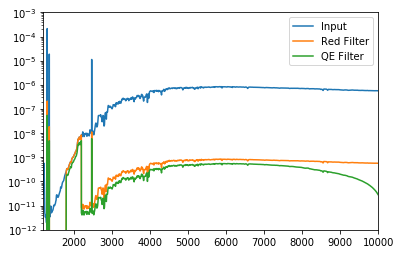

In [5]:
plt.plot(zodi['wavelength'], zodi['flux'], label='Input')
plt.plot(zodi['wavelength'], red_flux, label = 'Red Filter')
plt.plot(zodi['wavelength'], qe_flux, label='QE Filter')
plt.yscale('Log')
plt.ylim([1e-12, 1e-3])
plt.xlim([1200, 10000])
plt.legend()
plt.show()

In [6]:
received_flux = (qe_flux * wave.to(u.micron)).sum()
print('Received Sky Background: {}'.format(received_flux))

Received Sky Background: 1.6819495736507353e-06 W / (m2 sr)


In [7]:
from zodi import wavelength_to_energy
energy = wavelength_to_energy(wave)
de = wave[1] - wave[0]

ph_flux = ((de*qe_flux / energy).cgs).to(1 / ((u.cm**2 * u.arcsec**2 * u.s)))
fluence = ph_flux.sum()
print('Zodi fluence: {}'.format(fluence))

Zodi fluence: 1.9901507729576404e-06 1 / (arcsec2 cm2 s)


No handles with labels found to put in legend.


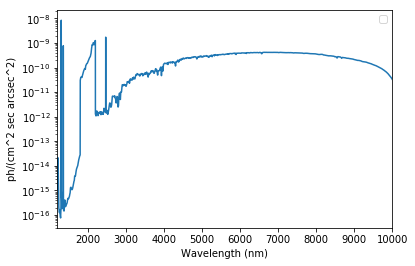

In [8]:
plt.plot(zodi['wavelength'], ph_flux)
plt.yscale('Log')
plt.xlabel('Wavelength (nm)')
plt.ylabel('ph/(cm^2 sec arcsec^2)')
plt.xlim([1200, 10000])
plt.legend()
plt.show()